# 차원 축소

- 차원 = 변수의 개수

In [ ]:
# 라이브러리 불러오기
import pandas as pd

In [ ]:
user = pd.read_csv('custom_data.csv')

**변수 설명**
- recency : 최근 구매일로부터의 경과일
- age : 나이
- children : 자녀 명수
- spent_all : 총 구매 금액
- purchase_num_all : 총 구매 횟수
- family_size : 총 가족 구성원 수

In [ ]:
user.head()

,recency,age,children,spent_all,purchase_num_all,family_size
0,58,66,0,1617,25,1
1,38,69,2,27,6,3
2,26,58,0,776,21,2
3,26,39,1,53,8,3
4,94,42,1,422,19,3


### k-means 클러스터링 (6차원 데이터)

먼저, 차원 축소를 하지 않고 6차원 데이터를 바탕으로 클러스터의 개수 k를 1부터 9까지 바꿔가면서 모델을 학습시킨 결과를 성능 지표인 inertia를 시각화

In [ ]:
# 라이브러리 불러오기
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
user.head()

,recency,age,children,spent_all,purchase_num_all,family_size
0,58,66,0,1617,25,1
1,38,69,2,27,6,3
2,26,58,0,776,21,2
3,26,39,1,53,8,3
4,94,42,1,422,19,3


In [ ]:
# 데이터 스케일링
user_mean = user.mean()  # 각 컬럼의 평균값
user_std = user.std()  # 각 컬럼의 표준편차
scaled_df = (user - user_mean) / user_std  # 컬럼별 표준화 진행

In [ ]:
scaled_df.head()

,recency,age,children,spent_all,purchase_num_all,family_size
0,0.307203,1.017069,-1.264336,1.680274,1.319490,-1.758931
1,-0.383498,1.273437,1.395108,-0.961623,-1.155566,0.445399
2,-0.797919,0.333420,-1.264336,0.282893,0.798426,-0.656766
3,-0.797919,-1.290245,0.065386,-0.918422,-0.895034,0.445399
4,1.550466,-1.033877,0.065386,-0.305303,0.537894,0.445399


In [ ]:
# 클러스터링
inertias = []

for k in range(1, 10):
    model = KMeans(n_clusters=k, random_state=123)
    model.fit(scaled_df)
    inertias.append(model.inertia_)

<Axes: >

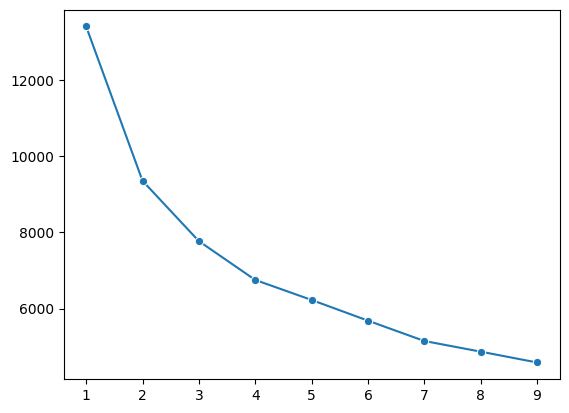

In [ ]:
# 시각화
sns.lineplot(x=range(1, 10), y=inertias, marker='o')

## k-means 클러스터링 (2차원 데이터)

In [ ]:
# 라이브러리 불러오기
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=2)  # n_components : 유지할 차원의 개수

In [ ]:
# PCA 적용
pca.fit(scaled_df)
scaled_df_pca = pca.transform(scaled_df)
pca_df = pd.DataFrame(scaled_df_pca)

In [ ]:
pca_df.head()

,0,1
0,3.043476,0.646301
1,-1.926976,0.528713
2,1.501383,-0.117994
3,-1.168100,-1.373146
4,-0.226542,-0.077045


In [ ]:
# k-means 클러스터링
inertias = []

for k in range(1, 10):
    model = KMeans(n_clusters=k)
    model.fit(pca_df)
    inertias.append(model.inertia_)

<Axes: >

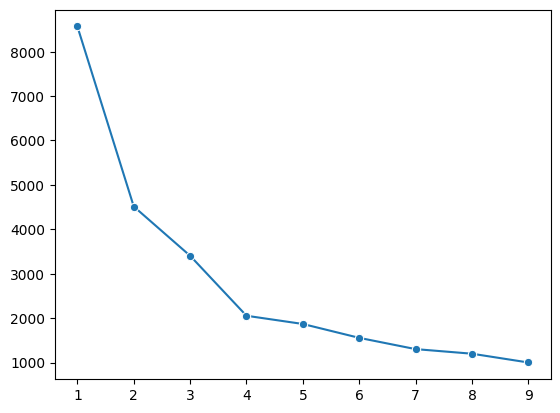

In [ ]:
# 시각화
sns.lineplot(x=range(1, 10), y=inertias, marker='o')

- 두 그래프 (6차원 데이터를 바탕으로 k-means 클러스터링을 한 결과, 2차원 데이터를 바탕으로 k-means 클러스터링을 한 결과) 를 비교해 보면, 2차원 데이터로 클러스터링 한 결과가 6차원 데이터로 클러스터링 한 결과보다 모든 클러스터 개수 k에 inertia 값이 작은 것을 알 수 있음
- 차원의 개수가 더 작을수록 클러스터링의 결과로 모인 데이터들이 더 많이 유사하고, 성능이 좋게 나옴
- 이렇게 차원이 커지면 분석의 성능이 떨어지는 차원의 저주 문제 발생

# 차원 축소란?

- 차원 축소 (dimensionality reduction) : 차원의 저주를 해결하는 대표적인 방법으로 데이터에 있는 차원 (변수) 의 숫자를 줄여서 차원의 저주를 해결하는 방법
- 차원 축소의 방법 : 1) 차원 선택 2) 차원 추출

### 차원 선택

- 차원 선택 : 전체 차원 중 의미 있다고 판단되는 것들만 선택해서 사용. 변수 들 간의 관계를 통해 덜 중요하거나 불필요한 변수를 찾아 데이터에서 제외하는 작업.
- 차원 선택을 적용할 때는 변수 중 무엇이 중요한지, 의미상 중복되는 것들이 있는지 등을 확인해야 함.

In [ ]:
user.head()

,recency,age,children,spent_all,purchase_num_all,family_size
0,58,66,0,1617,25,1
1,38,69,2,27,6,3
2,26,58,0,776,21,2
3,26,39,1,53,8,3
4,94,42,1,422,19,3


- 자녀가 있는 집은 그렇지 않은 집보다 가족 구성원 수가 좀 더 많을 것이기에 의미상 중복되는 경우에는 두 변수 중 하나를 제거하여 차원을 줄임.

In [ ]:
user = user.drop('children', axis=1)
user.head()

,recency,age,spent_all,purchase_num_all,family_size
0,58,66,1617,25,1
1,38,69,27,6,3
2,26,58,776,21,2
3,26,39,53,8,3
4,94,42,422,19,3


**차원 선택의 장점**

1. 사용이 쉬움

- 단순히 제거할 변수를 직관적으로 판단하고 선택하면 되므로 쉽고 빠르게 적용 가능

2. 결과를 이해하고 해석하기 쉬움

- 각 변수들의 특성이 유지되면서 차원을 줄기이 때문

**차원 선택의 단점**

- 정보 손실이 커짐
  - 데이터에서 제외한 변수들은 분명 이유가 있겠지만 전체 데이터에서 해당 변수만으로 설명되는 정보가 분명 존재할 수 있음

### 차원 추출

- 차원 추출 : 데이터를 가장 잘 설명하는 차원을 새롭게 생성하여 차원을 줄이는 방법으로 변수의 특징을 종합적으로 잘 나타내는 새로운 변수를 찾아내 변수를 통합하여 차원을 줄이는 방법

**차원 추출의 장점**

- 차원 선택과 달리 데이터를 설명하는 데 필요한 정보를 최대한 보존하기 때문에 차원 선택으로 뽑은 변수들로만 분석을 할 때마다 상대적으로 더 나은 성능을 보임

**차원 추출의 단점**

1. 여러 변수의 특징을 대표하기 위해 만들어진 새로운 변수가 정확하게 무엇을 의미하는 것인지 해석하기 어려움

2. 여러 변수를 대표하기 위한 새로운 변수를 생성하는 과정에서 데이터 간의 분산이나 거리를 계산하는 등 추가적인 연산을 해야 하므로 계산 비용 증가

### PCA (주성분 분석)

- PCA (Principal Component Analysis) : 주성분 분석으로 대표적인 차원 축소 기법 중 하나. 여러 차원들의 특징을 가장 잘 설명해주는 차원인 주성분 (PC; Principal Component) 을 이용하여 차원을 축소하는 방법

In [ ]:
scaled_df.head()

,recency,age,children,spent_all,purchase_num_all,family_size
0,0.307203,1.017069,-1.264336,1.680274,1.319490,-1.758931
1,-0.383498,1.273437,1.395108,-0.961623,-1.155566,0.445399
2,-0.797919,0.333420,-1.264336,0.282893,0.798426,-0.656766
3,-0.797919,-1.290245,0.065386,-0.918422,-0.895034,0.445399
4,1.550466,-1.033877,0.065386,-0.305303,0.537894,0.445399


In [ ]:
# 라이브러리 불러오기
from sklearn.decomposition import PCA

In [ ]:
# 모델 생성
pca = PCA(n_components=2)

# PCA 모델 학습
pca.fit(scaled_df)

# PC로 데이터 변환
scaled_df_pca = pca.transform(scaled_df)

# 데이터 프레임으로 변환
pca_df = pd.DataFrame(scaled_df_pca)

In [ ]:
# 데이터프레임 컬럼명 지정
pca_df.columns = ['PC1', 'PC2']
pca_df.head()

,PC1,PC2
0,3.043476,0.646301
1,-1.926976,0.528713
2,1.501383,-0.117994
3,-1.168100,-1.373146
4,-0.226542,-0.077045


2차원 데이터는 기존 6차원 데이터로 구성된 원본 데이터와는 달리 시각화 가능

<Axes: xlabel='PC1', ylabel='PC2'>

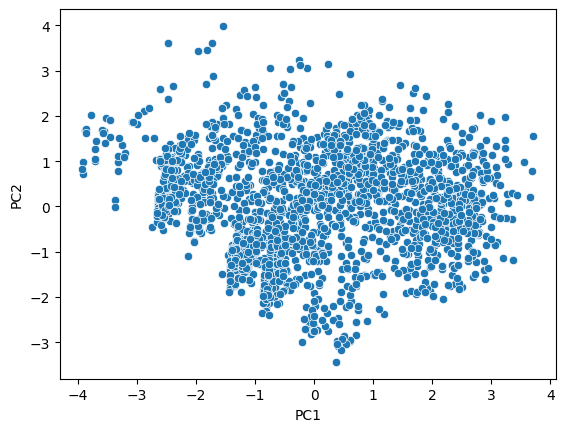

In [ ]:
sns.scatterplot(data=pca_df, x='PC1', y='PC2')

## 적절한 주성분 수 구하기

- PCA를 적용할 때 몇 개의 주성분으로 차원을 축소시킬지 정해야 한다.
- Scree Plot : 각 주성분이 전체 데이터에서 갖는 설명력 비율을 시각화한 플롯. 즉, 전체 주성분의 분산 대비 특정 주성분의 분산의 비율을 시각화

In [ ]:
scaled_df.head()

,recency,age,children,spent_all,purchase_num_all,family_size
0,0.307203,1.017069,-1.264336,1.680274,1.319490,-1.758931
1,-0.383498,1.273437,1.395108,-0.961623,-1.155566,0.445399
2,-0.797919,0.333420,-1.264336,0.282893,0.798426,-0.656766
3,-0.797919,-1.290245,0.065386,-0.918422,-0.895034,0.445399
4,1.550466,-1.033877,0.065386,-0.305303,0.537894,0.445399


In [ ]:
pca = PCA(n_components=6)
pca.fit(scaled_df)  # PCA 학습
scaled_df_pc = pca.transform(scaled_df)  # PC로 데이터 변환
pca_df = pd.DataFrame(scaled_df_pc)

In [ ]:
pca_df.columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6']
pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6
0,3.043476,0.646301,0.249843,0.704499,-0.066913,0.376684
1,-1.926976,0.528713,-0.431355,1.255031,0.085687,0.642017
2,1.501383,-0.117994,-0.800846,0.379732,-0.367393,-0.553751
3,-1.168100,-1.373146,-0.668054,-0.608071,0.036437,-0.285106
4,-0.226542,-0.077045,1.553274,-1.107927,-0.463466,-0.381861


6개의 PC가 각각 전체 데이터에서 어느 정도의 설명력을 가지는지, 즉, 전체 분산 대비 어느 정도의 분산 비율을 가지는지 확인

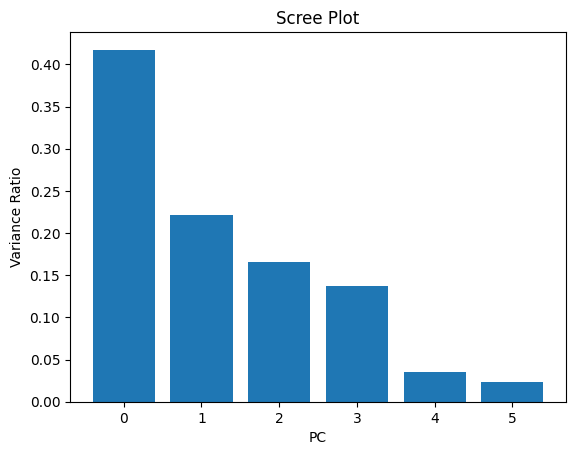

In [ ]:
# 라이브러리 불러오기
import numpy as np

# PCA 개수
num_components = len(pca.explained_variance_ratio_)

x = np.arange(num_components)
var = pca.explained_variance_ratio_

plt.bar(x, var)

plt.xlabel('PC')
plt.ylabel('Variance Ratio')
plt.title('Scree Plot')

plt.show()

- 주성분 1 (PC1) 은 전체 주성분이 설명해주는 데이터의 특성 대비 약 40%를 설명하고, 주성분 2 (PC 2) 는 약 20%를 설명
- Scree Plot의 결과를 바탕으로 최적의 주성분 개수를 구해야 하는데, 기준은 PC1부터 PC_N까지 분산 비율의 합을 누적했을 때 전체 대비 70% 이상이 되는 PC_N을 고르면 됨 (전체 분산 대비 분산 비율이 70%는 되어야 원본 데이터가 충분히 설명된다고 판단)

In [ ]:
var

array([0.41732609, 0.22130649, 0.16617276, 0.13680643, 0.03486132,
       0.02352691])

In [ ]:
cum_var = np.cumsum(var)  # 누적 분산비율 구하기

In [ ]:
pd.DataFrame(cum_var, index=pca_df.columns)

,0
PC1,0.417326
PC2,0.638633
PC3,0.804805
PC4,0.941612
PC5,0.976473
PC6,1.000000


- 결과를 보면, 3개의 주성분 (PC1, PC2, PC3) 이 있을 때 전체 주성분이 데이터를 설명하는 정도 대비 약 80% 정도를 설명하므로 주성분을 3개로 차원 축소하는 것이 적절하다고 할 수 있다.
- 분석의 목적 상 차원이 높은 데이터를 시각화를 하여 데이터의 특징을 파악해야 하는 경우 Scree Plot의 결과와 상관없이 차원을 2개 또는 3개로 축소한다.

### PCA의 특징

- PCA (Principal Component Analysis; 주성분 분석) : 고차원 데이터를 저차원 데이터로 축소시켜 주는 방법
- 차원을 축소시키면 차원의 저주 문제를 해결할 수 있고, 고차원의 데이터를 시각화하여 데이터의 특징을 한 눈에 파악할 수 있다.
- PCA는 데이터가 가진 중요한 정보를 최대한 보존하면서 차원을 축소

In [ ]:
# 데이터 불러오기
user = pd.read_csv('custom_data.csv')

In [ ]:
user.head()

,recency,age,children,spent_all,purchase_num_all,family_size
0,58,66,0,1617,25,1
1,38,69,2,27,6,3
2,26,58,0,776,21,2
3,26,39,1,53,8,3
4,94,42,1,422,19,3


1. 6차원 데이터를 5차원으로 줄이기 위해서는 의미가 비슷한 family_size와 children 중 하나의 변수를 제외시키면 된다.
2. 특정 변수 (children) 가 가진 고유한 정보가 데이터에서 삭제되기는 하지만, 공통된 의미를 설명하는 부분이 큰 변수 중 하나를 삭제했으니 (즉, children은 삭제, family_size는 보존) 정보 손실이 아주 크다고 하기는 어렵다.
3. 6차원 데이터를 차원 선택으로 2차원으로 줄이려면, 변수 간의 의미를 아무리 고려하여 삭제할 변수를 선택하더라도 정보의 손실이 매우 커진다.
4. 따라서, PCA를 사용하여 6차원 데이터를 2차원으로 차원을 축소시키면 새롭게 찾아진 두 개의 변수인 PC1과 PC2는 6개의 변수가 가지는 정보를 종합적으로 고려하여 찾아진 변수이기 때문에 정보 손실을 최소화할 수 있다.

In [ ]:
# 데이터 스케일링
user_mean = user.mean()  # 컬럼별 평균
user_std = user.std()  # 컬럼별 표준편차
scaled_df = (user - user_mean) / user_std  # 표준화된 데이터

In [ ]:
# PCA
pca = PCA(n_components=6)
pca.fit(scaled_df)
scaled_df_pc = pca.transform(scaled_df)
pca_df = pd.DataFrame(scaled_df_pc)

In [ ]:
pca_df.columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6']
pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6
0,3.043476,0.646301,0.249843,0.704499,-0.066913,0.376684
1,-1.926976,0.528713,-0.431355,1.255031,0.085687,0.642017
2,1.501383,-0.117994,-0.800846,0.379732,-0.367393,-0.553751
3,-1.168100,-1.373146,-0.668054,-0.608071,0.036437,-0.285106
4,-0.226542,-0.077045,1.553274,-1.107927,-0.463466,-0.381861


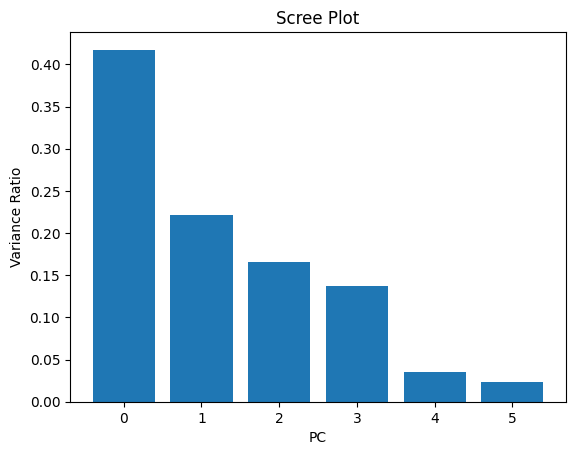

In [ ]:
# 주성분의 설명력 확인
num_components = len(pca.explained_variance_ratio_)

x = np.arange(num_components)
var = pca.explained_variance_ratio_

# Scree Plot 시각화
plt.bar(x, var)
plt.xlabel('PC')
plt.ylabel('Variance Ratio')
plt.title('Scree Plot')

plt.show()

In [ ]:
var

array([0.41732609, 0.22130649, 0.16617276, 0.13680643, 0.03486132,
       0.02352691])

In [ ]:
pd.DataFrame(np.cumsum(var))

,0
0,0.417326
1,0.638633
2,0.804805
3,0.941612
4,0.976473
5,1.000000


**PCA의 장점**

1. 변수가 가진 정보를 최대한 보존하는 방식으로 차원을 줄인다.

2. 변수가 가진 정보를 잘 보존해주기 때문에 PCA를 통해 차원 축소한 데이터를 활용하여 예측 모델을 학습시키면 더 정확하고 일반화된 결과물을 얻을 수 있다.

**PCA의 단점**

1. PCA의 결과로 찾아진 주성분의 의미를 해석하는 것이 어렵다.

- 주성분은 변수들 안에 포함된 여러 정보를 종합적으로 고려하여 새롭게 추출된 차원인데, 하나의 주성분이 하나의 변수와 매칭되는 것이 아니라 여러 변수의 영향력을 종합적으로 고려한 것이므로 확인된 주성분이 명확하게 무엇을 의미하는지 정의가 어렵다.

2. PCA는 거의 모든 데이터의 정보를 최대한 보존하는 방향으로 주성분을 구하기 때문에 이 과정에 많은 연산이 필요하다.

## PCA와 k-means 클러스터링

In [ ]:
credit_df1 = pd.read_csv('CC_GENERAL.csv')
credit_df1.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [ ]:
credit_df1.shape

(8950, 18)

In [ ]:
credit_df2 = credit_df1.drop('CUST_ID', axis=1)
credit_df2.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [ ]:
credit_df2.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.612411,2895.063757,2330.588021,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,170.857654,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,335.628312,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,864.206542,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [ ]:
scaled_credit_df2 = (credit_df2 - credit_df2.mean()) / credit_df2.std()  # 컬럼별 표준화
scaled_credit_df2.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.731948,-0.249421,-0.424876,-0.356914,-0.349059,-0.466759,-0.806445,-0.678623,-0.707274,-0.675311,-0.476043,-0.511305,-0.960380,-0.528949,-3.109502e-01,-0.525522,0.360659
1,0.786917,0.134317,-0.469526,-0.356914,-0.454551,2.605459,-1.221690,-0.678623,-0.916944,0.573931,0.110068,-0.591763,0.688601,0.818596,8.930522e-02,0.234214,0.360659
2,0.447110,0.518055,-0.107662,0.108882,-0.454551,-0.466759,1.269772,2.673302,-0.916944,-0.675311,-0.476043,-0.109014,0.826016,-0.383783,-1.016575e-01,-0.525522,0.360659
3,0.049096,-1.016896,0.232045,0.546159,-0.454551,-0.368633,-1.014069,-0.399297,-0.916944,-0.258899,-0.329515,-0.551534,0.826016,-0.598655,9.756065e-17,-0.525522,0.360659
4,-0.358755,0.518055,-0.462037,-0.347275,-0.454551,-0.466759,-1.014069,-0.399297,-0.916944,-0.675311,-0.476043,-0.551534,-0.905414,-0.364347,-2.657764e-01,-0.525522,0.360659


### PCA

- CUST_ID를 제외하면 데이터에 총 17개의 변수가 있는데, 차원이 너무 많아서 데이터의 분포나 특징을 시각화해서 파악하는 것이 어렵다.
- 따라서, PCA를 통해서 모든 차원의 특징을 최대한 살리면서, 동시에 데이터의 특징을 한눈에 알아볼 수 있도록 2차원으로 차원 축소

In [ ]:
X = scaled_credit_df2.copy()

In [ ]:
# PCA
pca = PCA(n_components=2)

# 모델 학습
pca.fit(X)
x_pca = pca.transform(X)
pca_df = pd.DataFrame(x_pca)
pca_df.head()

,0,1
0,-1.682126,-1.076390
1,-1.138231,2.506337
2,0.969630,-0.383499
3,-0.873579,0.043163
4,-1.599344,-0.688542


### k-means 클러스터링

- PCA를 통해 17차원 데이터를 2차원으로 축소한 데이터를 활용하여 클러스터링

In [ ]:
# Elbow Plot
inertias = []

for k in range(1, 10):
    model = KMeans(n_clusters=k)
    model.fit(pca_df)
    inertias.append(model.inertia_)

<Axes: >

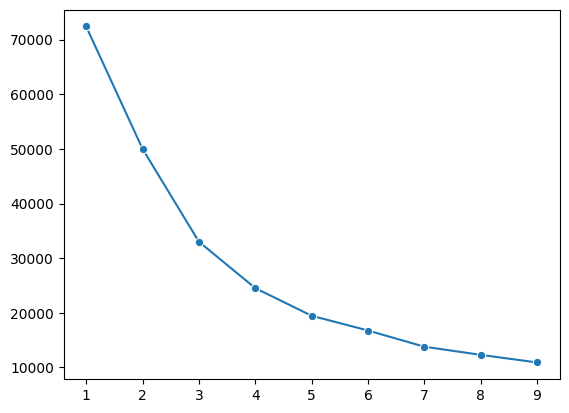

In [ ]:
# 시각화
sns.lineplot(x=range(1, 10), y=inertias, marker='o')

- 기울기를 확인해보니, 클러스터의 개수 k의 값이 6일 때부터 inertia의 값의 감소폭이 작아지는 것을 확인할 수 있으므로 k를 6으로 지정한 후에 k-means 클러스터링 실시

In [ ]:
model = KMeans(n_clusters=6)
model.fit(pca_df)
labels = model.labels_  # 고객마다 부여할 클러스터

In [ ]:
x, y = pca_df[0], pca_df[1]

In [ ]:
# PCA를 통해 차원 축소한 데이터프레임에 클러스터의 번호를 부여
pca_km_df = pd.DataFrame({'PC1' : x, 'PC2' : y, 'label' : labels})
pca_km_df.head()

,PC1,PC2,label
0,-1.682126,-1.076390,4
1,-1.138231,2.506337,1
2,0.969630,-0.383499,0
3,-0.873579,0.043163,4
4,-1.599344,-0.688542,4


<Axes: xlabel='PC1', ylabel='PC2'>

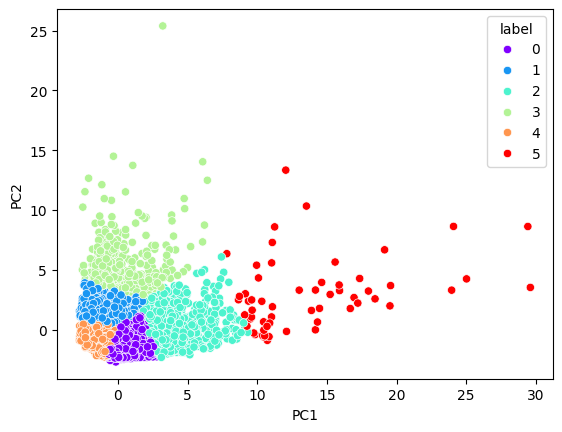

In [ ]:
# 시각화
sns.scatterplot(data=pca_km_df, x='PC1', y='PC2', hue='label', palette='rainbow')

### 클러스터 결과 해석

In [ ]:
pca_km_df.head()

,PC1,PC2,label
0,-1.682126,-1.076390,4
1,-1.138231,2.506337,1
2,0.969630,-0.383499,0
3,-0.873579,0.043163,4
4,-1.599344,-0.688542,4


In [ ]:
pca_km_df.shape

(8950, 3)

클러스터의 해석을 위해 원본 데이터에 클러스터 부여

In [ ]:
credit_df1['cluster'] = labels

In [ ]:
credit_df1.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,4
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,4
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,4


In [ ]:
credit_df1.groupby(['cluster'])['CUST_ID'].count()

,CUST_ID
cluster,
0,2923
1,1644
2,828
3,475
4,3022
5,58


- 클러스터 4 (cluster : 4) 에 속한 고객이 수가 가장 많고, 클러스터 5 (cluster : 5) 에 속한 고객의 수가 가장 적은 것을 확인할 수 있다.

In [ ]:
credit_df1 = credit_df1.drop(columns='CUST_ID')

In [ ]:
credit_df1.groupby(['cluster']).mean().T

cluster,0,1,2,3,4,5
BALANCE,699.959838,2759.026344,2543.817681,6094.929267,699.216300,5272.822278
BALANCE_FREQUENCY,0.914090,0.944573,0.985503,0.977067,0.757772,0.977900
PURCHASES,1027.243370,254.118382,4212.321594,675.038189,229.300986,18222.194310
ONEOFF_PURCHASES,479.200123,175.533321,2664.687681,431.231158,160.335195,12367.354655
INSTALLMENTS_PURCHASES,548.273657,78.619562,1548.358551,243.947979,69.392485,5854.839655
CASH_ADVANCE,112.170309,2257.721137,547.738350,6727.107038,331.054073,1241.042932
PURCHASES_FREQUENCY,0.847531,0.181072,0.954824,0.324400,0.203189,0.946552
ONEOFF_PURCHASES_FREQUENCY,0.259908,0.085648,0.679511,0.165005,0.074650,0.773720
PURCHASES_INSTALLMENTS_FREQUENCY,0.661492,0.101888,0.778223,0.216980,0.120762,0.832628
CASH_ADVANCE_FREQUENCY,0.026257,0.340717,0.077291,0.580688,0.075500,0.080460


- 클러스터별 특징을 활용해서 **대출 서비스를 제안할 고객들을 찾아보기 위하여** 대출과 관련이 있어 보이는 잔액 (BALANCE), 잔액 갱신 빈도 (BALANCE_FREQUENCY) 두 컬럼을 활용해서 클러스터별 특징 파악

In [ ]:
credit_df1.groupby(['cluster']).mean().T.iloc[[0,1],]

cluster,0,1,2,3,4,5
BALANCE,699.959838,2759.026344,2543.817681,6094.929267,699.216300,5272.822278
BALANCE_FREQUENCY,0.914090,0.944573,0.985503,0.977067,0.757772,0.977900


- 클러스터 0 : 평균 잔액이 낮은 편, 잔액 갱신 빈도는 낮은 편인 고객군
- 클러스터 4 : 평균 잔액이 낮은 편, 잔액 갱신 빈도가 가장 낮은 고객군

**결론**

대출 서비스를 제안한다고 가정했을 때 평균 잔액 (BALANCE) 이 적고, 잔액 갱신 빈도 (BALANCE_FREQUENCY) 가 낮아 대출에 대한 수요가 있을 것으로 추정되는 클러스터 0과 클러스터 4의 고객들에게 제안하는 것이 합리적인 제안이라고 판단